# This notebook is to find a formaular to calculate a rating for bowlers. 

The Formular will first look something as below
    Z = X1.C1 + X2.C2 + ... Xn.Cn
    Where X are the player attributes ( wickes,economy, etc) and Cs are coefficients which represents the weights of the attributes. 
    These weights will be calculated by finding out how important a attribute is in defining an outcome for a match. 

# 1. Calculating the Cs of the formular

In [135]:
#Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


#For Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [136]:
pd.set_option('display.max_rows',5000)
pd.set_option('max_columns', None)

In [137]:
df = pd.read_csv('/Users/thejakamahaulpatha/PycharmProjects/Cricket Project/Dataset/bowlmatchstatfinal.csv')

In [138]:
df.shape

(24244, 23)

In [139]:
df.columns

Index(['Unnamed: 0', 'Player', 'Overs Bowled', 'Maidens', 'Runs Conceded',
       'Wickets Taken', 'Economy', 'Bowl Inning', 'Opposition', 'Ground',
       'Date', 'Bowling Hand', 'Bowling Style', 'Match Time', 'Balled',
       'Player Country', 'Team', 'Team Score', 'Overs', 'Runs per Over',
       'Bat Inning', 'Result', 'Wickets Fallen'],
      dtype='object')

In [140]:
df.head()

,Unnamed: 0,Player,Overs Bowled,Maidens,Runs Conceded,Wickets Taken,Economy,Bowl Inning,Opposition,Ground,Date,Bowling Hand,Bowling Style,Match Time,Balled,Player Country,Team,Team Score,Overs,Runs per Over,Bat Inning,Result,Wickets Fallen
0,0,IS Sodhi,8.0,0,40,1,5.00,2,Ireland,Dublin (Malahide),2017-05-14,Right,Spinner,Day,True,NZ,New Zealand,289,50,5.78,1,won,7.0
1,1,LRPL Taylor,0.0,0,0,0,0.00,2,Ireland,Dublin (Malahide),2017-05-14,Right,Spinner,Day,False,NZ,New Zealand,289,50,5.78,1,won,7.0
2,2,SHA Rance,8.3,1,44,1,5.17,2,Ireland,Dublin (Malahide),2017-05-14,Right,Fast Bowler,Day,True,NZ,New Zealand,289,50,5.78,1,won,7.0
3,3,JDS Neesham,6.0,0,37,0,6.16,2,Ireland,Dublin (Malahide),2017-05-14,Right,Fast Bowler,Day,True,NZ,New Zealand,289,50,5.78,1,won,7.0
4,4,TWM Latham,0.0,0,0,0,0.00,2,Ireland,Dublin (Malahide),2017-05-14,Right,Fast Bowler,Day,False,NZ,New Zealand,289,50,5.78,1,won,7.0


In [141]:
df.tail()

,Unnamed: 0,Player,Overs Bowled,Maidens,Runs Conceded,Wickets Taken,Economy,Bowl Inning,Opposition,Ground,Date,Bowling Hand,Bowling Style,Match Time,Balled,Player Country,Team,Team Score,Overs,Runs per Over,Bat Inning,Result,Wickets Fallen
24239,24239,AJ Finch,0.0,0,0,0,0.00,2,England,Cardiff,2013-09-14,Left,Spinner,Day,False,AUS,Australia,227,48,4.69,1,lost,NaN
24240,24240,AC Voges,0.0,0,0,0,0.00,2,England,Cardiff,2013-09-14,Left,Spinner,Day,False,AUS,Australia,227,48,4.69,1,lost,NaN
24241,24241,MJ Clarke,0.0,0,0,0,0.00,2,England,Cardiff,2013-09-14,Left,Spinner,Day,False,AUS,Australia,227,48,4.69,1,lost,NaN
24242,24242,JP Faulkner,10.0,1,43,1,4.30,2,England,Cardiff,2013-09-14,Left,Fast Bowler,Day,True,AUS,Australia,227,48,4.69,1,lost,NaN
24243,24243,MG Johnson,9.3,0,64,0,6.73,2,England,Cardiff,2013-09-14,Left,Fast Bowler,Day,True,AUS,Australia,227,48,4.69,1,lost,NaN


In [142]:
df.describe()

,Unnamed: 0,Overs Bowled,Maidens,Runs Conceded,Wickets Taken,Economy,Bowl Inning,Team Score,Overs,Runs per Over,Bat Inning,Wickets Fallen
count,24244.000000,24244.000000,24244.000000,24244.000000,24244.000000,24244.000000,24244.00000,24244.000000,24244.000000,24244.000000,24244.00000,15752.000000
mean,12121.500000,4.015872,0.170558,20.939243,0.624154,3.002224,1.50000,234.705535,44.036751,5.291506,1.50000,5.946927
std,6998.784299,4.155215,0.480865,22.862469,1.051911,3.076322,0.50001,67.196384,8.544712,1.124221,0.50001,2.314403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,13.000000,3.000000,2.130000,1.00000,0.000000
25%,6060.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,193.000000,41.000000,4.540000,1.00000,4.000000
50%,12121.500000,3.000000,0.000000,14.000000,0.000000,3.200000,1.50000,237.000000,48.000000,5.210000,1.50000,6.000000
75%,18182.250000,8.200000,0.000000,40.000000,1.000000,5.400000,2.00000,280.000000,50.000000,5.972500,2.00000,8.000000
max,24243.000000,10.000000,5.000000,110.000000,7.000000,36.000000,2.00000,481.000000,50.000000,14.160000,2.00000,9.000000


In [143]:
df.dtypes

Unnamed: 0          int64
Player             object
Overs Bowled      float64
Maidens             int64
Runs Conceded       int64
Wickets Taken       int64
Economy           float64
Bowl Inning         int64
Opposition         object
Ground             object
Date               object
Bowling Hand       object
Bowling Style      object
Match Time         object
Balled               bool
Player Country     object
Team               object
Team Score          int64
Overs               int64
Runs per Over     float64
Bat Inning          int64
Result             object
Wickets Fallen    float64
dtype: object

In [144]:
df['Result'].unique()

array(['won', 'lost', 'tied', 'n/r'], dtype=object)

In [145]:
# Let's remove the 'n/r' rows as this is not an outcome.

In [146]:
#Create a null array to include the indexes where 'n/r' exists
index = []
for i in range(len(df.index)):
    if df['Result'].values[i] == "n/r":
        index.append(i)

# Drop the rows where the 'n/r' is located
for j in index:
    df = df.drop(j)


In [147]:
#Let's check whether we have successfully dropped the 'n/r' values

In [148]:
df['Result'].unique()

array(['won', 'lost', 'tied'], dtype=object)

In [149]:
df.shape

(23980, 23)

In [150]:
df['Overs Bowled'].unique()

array([ 8. ,  0. ,  8.3,  6. ,  9. ,  4. , 10. ,  2. ,  7. ,  6.1,  6.3,
        9.2,  5.4,  3.1,  5. ,  3. ,  9.4,  9.5,  1. ,  4.4,  9.3,  1.2,
        4.3,  6.4,  1.3,  5.3,  0.5,  5.1,  8.4,  8.1,  8.2,  8.5,  7.3,
        5.5,  9.1,  4.2,  5.2,  1.5,  3.3,  7.5,  7.4,  7.2,  7.1,  4.1,
        2.3,  0.4,  2.2,  4.5,  3.4,  0.3,  1.4,  0.2,  1.1,  6.2,  2.1,
        2.4,  2.5,  6.5,  0.1,  3.5,  3.2])

In [151]:
# Now let's Remove the rows which the player had not batted as this will not make an impact for the Result. 

In [152]:
#Create a null array to include the indexes where '0.0' exists in 'Overs Bowled' Column

df.drop(df[df['Overs Bowled'] == 0.0].index, inplace = True)


In [153]:
#Let's check whether we have successfully dropped the '0.0' values in 'Overs Bowled' column

In [154]:
df['Overs Bowled'].unique()

array([ 8. ,  8.3,  6. ,  9. ,  4. , 10. ,  2. ,  7. ,  6.1,  6.3,  9.2,
        5.4,  3.1,  5. ,  3. ,  9.4,  9.5,  1. ,  4.4,  9.3,  1.2,  4.3,
        6.4,  1.3,  5.3,  0.5,  5.1,  8.4,  8.1,  8.2,  8.5,  7.3,  5.5,
        9.1,  4.2,  5.2,  1.5,  3.3,  7.5,  7.4,  7.2,  7.1,  4.1,  2.3,
        0.4,  2.2,  4.5,  3.4,  0.3,  1.4,  0.2,  1.1,  6.2,  2.1,  2.4,
        2.5,  6.5,  0.1,  3.5,  3.2])

In [155]:
df.shape

(13329, 23)

In [156]:
#Let's see which attributes makes sense to be taken for the calculation. 
#We can see the Wickets Taken,Economy,Bowling Hand,Bowling Style are key attributes relate to measuring batsman statistic

In [157]:
#Before fitting a model we need to change the nominal values of the Results to a integer values

In [158]:
# Let's replace these values with int
df['Result'].replace({"lost": int(0),"won":int(1),"tied":int(2)}, inplace=True)

#### We need the Bowling Hand & Bowling Styles to be numerically interpreted

In [159]:
result1 = df['Bowling Hand'].unique()
result2 = df['Bowling Style'].unique()


In [160]:
#Check the unique values
result1

array(['Right', 'Left', 'Unknown Arm'], dtype=object)

In [161]:
#We Need to remove 'Unknown Arms' assuming these are not regular bowlers.

In [162]:
df.drop(df[df['Bowling Hand'] == 'Unknown Arm'].index, inplace = True)

In [163]:
df['Bowling Hand'].unique()

array(['Right', 'Left'], dtype=object)

In [164]:
# Let's replace these values with int
df['Bowling Hand'].replace({"Right": int(1),"Left":int(2)},inplace=True)

In [165]:
df['Bowling Hand'].unique()

array([1, 2])

In [166]:
result2

array(['Spinner', 'Fast Bowler', 'Mixed', 'Unknown'], dtype=object)

In [167]:
#We Need to remove 'Unknown' assuming these are not regular bowlers.

In [168]:
df.drop(df[df['Bowling Style'] == 'Unknown'].index, inplace = True)

In [169]:
df['Bowling Style'].unique()

array(['Spinner', 'Fast Bowler', 'Mixed'], dtype=object)

In [170]:
# Let's replace these values with int
df['Bowling Style'].replace({"Spinner": int(1),"Fast Bowler":int(2),"Mixed":int(3)},inplace=True)

In [171]:
df['Bowling Style'].unique()

array([1, 2, 3])

In [172]:
# We will see the data types of the columns we have chose incase before fitting the model ('Runs','Strike Rate','Result')

In [173]:
df.dtypes

Unnamed: 0          int64
Player             object
Overs Bowled      float64
Maidens             int64
Runs Conceded       int64
Wickets Taken       int64
Economy           float64
Bowl Inning         int64
Opposition         object
Ground             object
Date               object
Bowling Hand        int64
Bowling Style       int64
Match Time         object
Balled               bool
Player Country     object
Team               object
Team Score          int64
Overs               int64
Runs per Over     float64
Bat Inning          int64
Result              int64
Wickets Fallen    float64
dtype: object

In [174]:
# We will see the selected distributions through a histrogram

<AxesSubplot:>

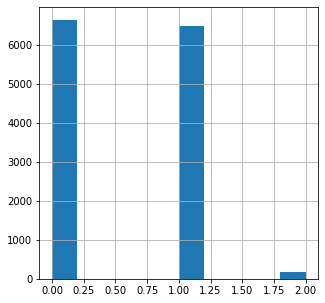

In [175]:
df['Result'].hist(figsize = (5, 5))

<AxesSubplot:>

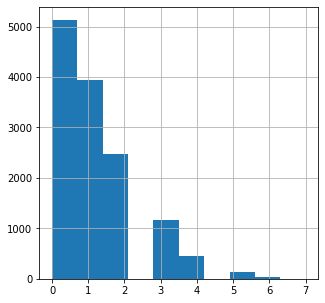

In [176]:
df['Wickets Taken'].hist(figsize = (5, 5))

In [177]:
# Now let's define our training and testing data sets from the data frame we have

In [178]:
x = df.iloc[:,[5,6,11,12]].values
y = df.iloc[:,21].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1) 

In [179]:
#We will see which algorithm gives the best results for predicting the outcome. 
#Creating a list with the models

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM',SVC(gamma='auto')))

In [180]:
results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_results.mean(),cv_results.std()))


LR: 0.617288 (0.002504)
LDA: 0.617889 (0.003105)
KNN: 0.573618 (0.006711)
CART: 0.545272 (0.003806)
NB: 0.617188 (0.005609)
RFC: 0.560897 (0.002003)
SVM: 0.618189 (0.000401)


In [32]:
# We can see the Support Vector Machine gives a better result.

In [33]:
# Let's test the feature significance for this algorithm.

In [34]:
#Permutation Importance
#provides a way to compute feature importances for any black-box estimator by 
#measuring how score decreases when a feature is not available; the method is also 
#known as “permutation importance” or “Mean Decrease Accuracy (MDA)”.

Feature: 0, Score: 0.06085
Feature: 1, Score: 0.05101
Feature: 2, Score: 0.00096


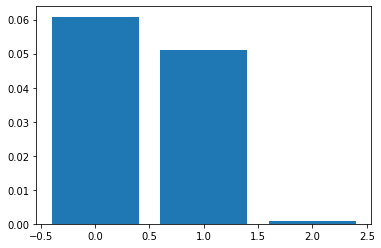

In [63]:
model = LinearDiscriminantAnalysis()
# fit the model
model.fit(x_train, y_train)

# get importance
imps = permutation_importance(model, x_test, y_test)

importance = imps.importances_mean

# summarize feature importance
for i,v in enumerate(imps.importances_mean):
#     print(importance[i])
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
model = svm.SVC(kernel='poly')

# fit the model
model.fit(x_train, y_train)

print('b = ', model.intercept_)
print('Indices of support vectors = ', model.support_)
print('Support vectors = ', model.support_vectors_)
print('Number of support vectors for each class = ', model.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(model.dual_coef_))


# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

b =  [-0.85400017  1.00014959  1.00035983]
Indices of support vectors =  [   0    2    3 ... 9817 9872 9915]
Support vectors =  [[ 2.   12.5   1.  ]
 [ 1.    4.14  2.  ]
 [ 1.    4.88  2.  ]
 ...
 [ 3.    2.3   2.  ]
 [ 0.    5.5   2.  ]
 [ 0.    4.2   2.  ]]
Number of support vectors for each class =  [4167 4177  141]
Coefficients of the support vector in the decision function =  [[0.         1.         1.         ... 1.         1.         1.        ]
 [0.01378333 0.         0.         ... 1.         1.         1.        ]]


#### C1 = 0.07784
#### C2 = 0.01637
#### So the forumula will look as   Z = (Average Runs)(0.07784) + (Average Strike Rate)(0.01637)

# Now let's find the rakings of players accordance with their batting score Z

In [36]:
#Calculating for a single player

playerName = 'KC Sangakkara'
totalRuns=0
strikeRate=0
count=0
batsmanRating = 0

for i in range(len(df.index)):
    if df['Player'].values[i] == playerName:
        totalRuns=totalRuns + df['Runs'].values[i]
        strikeRate = strikeRate + df['Strick Rate'].values[i]
        count = count+1
        
averageRuns = totalRuns/count    
averageStrikeRate = strikeRate/count    

print(averageRuns,averageStrikeRate)

batsmanRating = (averageRuns*0.07784)+(averageStrikeRate*0.01637)
print(batsmanRating)

47.0377358490566 75.76264150943396
4.9016518


In [37]:
#Let's Find the same for all the players and put them in an array

In [66]:
playerNameArr = df['Player'].unique()

batsmanStat = pd.DataFrame({
    'Player Name':
    [],
    'Total Played Innings':
    [],
    'Total Runs':
    [],
    'averageRuns':
    [],
    'averageStrikeRate':
    [],
    'bowlerRating':
    []
})


for player in playerNameArr:
    
    playerName = player
    totalRuns=0
    strikeRate=0
    count=0
    batsmanRating = 0
    
    for i in range(len(df.index)):
        if df['Player'].values[i] == playerName:
            totalRuns=totalRuns + df['Runs'].values[i]
            strikeRate = strikeRate + df['Strick Rate'].values[i]
            count = count+1
    
    averageRuns = totalRuns/count    
    averageStrikeRate = strikeRate/count   
    batsmanRating = (averageRuns*0.07784)+(averageStrikeRate*0.01637)
    
#     batsmanStat['Player Name'].values[] 
    batsmanStat.loc[len(batsmanStat.index)] = [playerName,count,totalRuns,averageRuns,averageStrikeRate,batsmanRating] 

    

In [67]:
print(batsmanStat)

         Player Name  Total Played Innings  Total Runs  averageRuns  \
0        A Dananjaya                  27.0       283.0    10.481481   
1   S Samarawickrama                   7.0       138.0    19.714286   
2    HDRL Thirimanne                 102.0      3138.0    30.764706   
3        WU Tharanga                 104.0      2888.0    27.769231   
4        NLTC Perera                 117.0      2135.0    18.247863   
5         PLS Gamage                   5.0         4.0     0.800000   
6       LD Chandimal                 127.0      3460.0    27.244094   
7         RAS Lakmal                  45.0       241.0     5.355556   
8        N Dickwella                  49.0      1571.0    32.061224   
9    TAM Siriwardana                  23.0       486.0    21.130435   
10        S Prasanna                  36.0       419.0    11.638889   
11    MD Gunathilaka                  38.0      1426.0    37.526316   
12     DAS Gunaratne                  24.0       536.0    22.333333   
13    

In [68]:
batsmanStat.sort_values(by=['batsmanRating'],ascending=False)

,Player Name,Total Played Innings,Total Runs,averageRuns,averageStrikeRate,batsmanRating
26,KC Sangakkara,106.0,4986.0,47.037736,75.762642,4.901652
62,KNA Bandara,3.0,123.0,41.000000,73.976667,4.402438
23,TM Dilshan,121.0,4734.0,39.123967,79.897190,4.353327
70,M Bhanuka,1.0,36.0,36.000000,92.300000,4.313191
11,MD Gunathilaka,38.0,1426.0,37.526316,80.296053,4.235495
54,WIA Fernando,18.0,653.0,36.277778,79.957778,4.132771
8,N Dickwella,49.0,1571.0,32.061224,91.354082,3.991112
33,MD Shanaka,19.0,488.0,25.684211,115.635263,3.892208
20,DPMD Jayawardene,96.0,3198.0,33.312500,73.600313,3.797882
22,AD Mathews,153.0,4909.0,32.084967,76.648039,3.752222


In [69]:
#We need to find a way to take the total number of played innings into the consideration as you can see
#ones who has played less innings are better in maintaining the average as the risk is very low of getting out. 

#This topic will be for a nother day

In [70]:
#Let's Take the players who have atleast played more than 15 innings

In [71]:
batsmanStat2 = batsmanStat.loc[batsmanStat['Total Played Innings'] > 10]

In [72]:
batsmanStat2.sort_values(by=['batsmanRating'],ascending=False)

,Player Name,Total Played Innings,Total Runs,averageRuns,averageStrikeRate,batsmanRating
26,KC Sangakkara,106.0,4986.0,47.037736,75.762642,4.901652
23,TM Dilshan,121.0,4734.0,39.123967,79.897190,4.353327
11,MD Gunathilaka,38.0,1426.0,37.526316,80.296053,4.235495
54,WIA Fernando,18.0,653.0,36.277778,79.957778,4.132771
8,N Dickwella,49.0,1571.0,32.061224,91.354082,3.991112
33,MD Shanaka,19.0,488.0,25.684211,115.635263,3.892208
20,DPMD Jayawardene,96.0,3198.0,33.312500,73.600313,3.797882
22,AD Mathews,153.0,4909.0,32.084967,76.648039,3.752222
18,MDKJ Perera,94.0,2798.0,29.765957,80.954468,3.642207
2,HDRL Thirimanne,102.0,3138.0,30.764706,64.185196,3.445436
